In [0]:
import pandas as pd
import re
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import LinearSVC, SVC
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import os # accessing directory structure
from sklearn import preprocessing

In [0]:
def clean_str(string):
    string = re.sub(r"\n", "", string)
    string = re.sub(r"\r", "", string)
    string = re.sub(r"[0-9]", "digit", string)
    string = re.sub(r"\'", "", string)
    string = re.sub(r"\"", "", string)
    
    return string.strip().lower()

In [0]:
df = pd.read_csv("advertising.csv")



In [0]:
df.head(50)

,Index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,12.0
3,4,151.5,41.3,58.5,16.5
4,5,180.8,10.8,58.4,17.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,15.6


In [0]:
df.tail(50)

,Index,TV,Radio,Newspaper,Sales
150,151,280.7,13.9,37.0,16.1
151,152,121.0,8.4,48.7,11.6
152,153,197.6,23.3,14.2,16.6
153,154,171.3,39.7,37.7,16.0
154,155,187.8,21.1,9.5,20.6
155,156,4.1,11.6,5.7,3.2
156,157,93.9,43.5,50.5,15.3
157,158,149.8,1.3,24.3,10.1
158,159,11.7,36.9,45.2,7.3
159,160,131.7,18.4,34.6,12.9


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Index        200 non-null int64
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [0]:
nRowsRead = 'None' 
df.dataframeName = 'dataset.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 200 rows and 5 columns


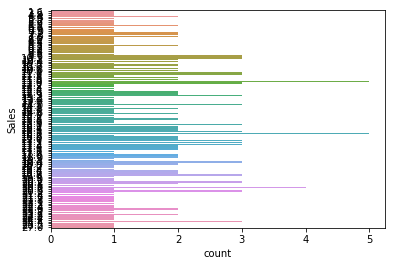

In [0]:
sns.countplot(y="Sales", data=df)

In [0]:
df.isnull().sum()

Index        0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [0]:
df = df.fillna(method = 'bfill')
df.isnull().sum()

Index        0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [0]:
df.describe()

,Index,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,15.130500
std,57.879185,85.854236,14.846809,21.778621,5.283892
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,11.000000
50%,100.500000,149.750000,22.900000,25.750000,16.000000
75%,150.250000,218.825000,36.525000,45.100000,19.050000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [0]:
print("Dataset Lenght:: ", len(df))
print("Dataset Shape:: ", df.shape)

Dataset Lenght::  200
Dataset Shape::  (200, 5)


Plotting the Sales Distribution Plot

In [0]:
#Feature Selection
df = df.drop(columns=['Index'])

Text(0.5, 0, 'Continuous Variable')

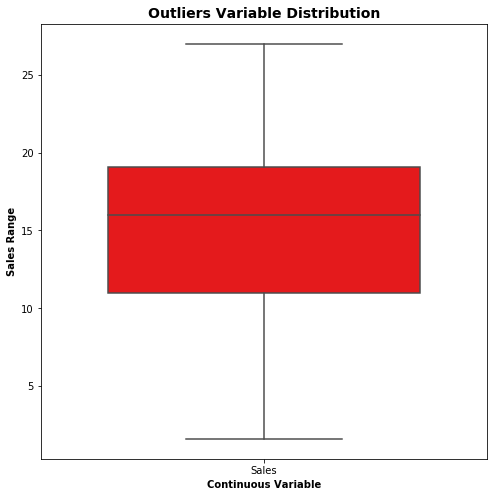

In [0]:
# Outlier Analysis of target variable with maximum amount of Inconsistency

outliers = ['Sales']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Sales Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')

In [0]:
# Calculating the Missing Values % contribution in DF

df_null = df.isna().mean().round(4) * 100

df_null.sort_values(ascending=False).head()

Sales        0.0
Newspaper    0.0
Radio        0.0
TV           0.0
Index        0.0
dtype: float64

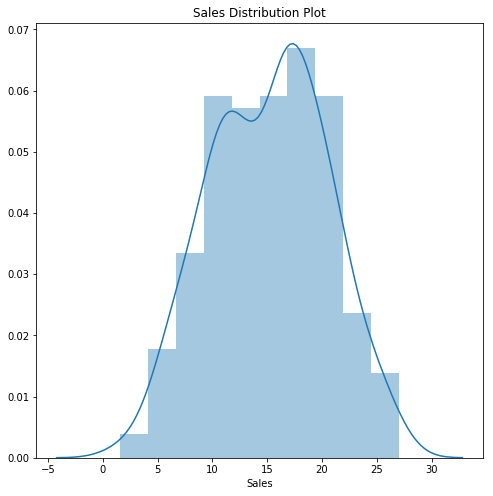

In [0]:
plt.figure(figsize=(8,8))

plt.title('Sales Distribution Plot')
sns.distplot(df['Sales'])

**Pairplot of all the numeric variables**
We find that TV has a linear relation with Sales

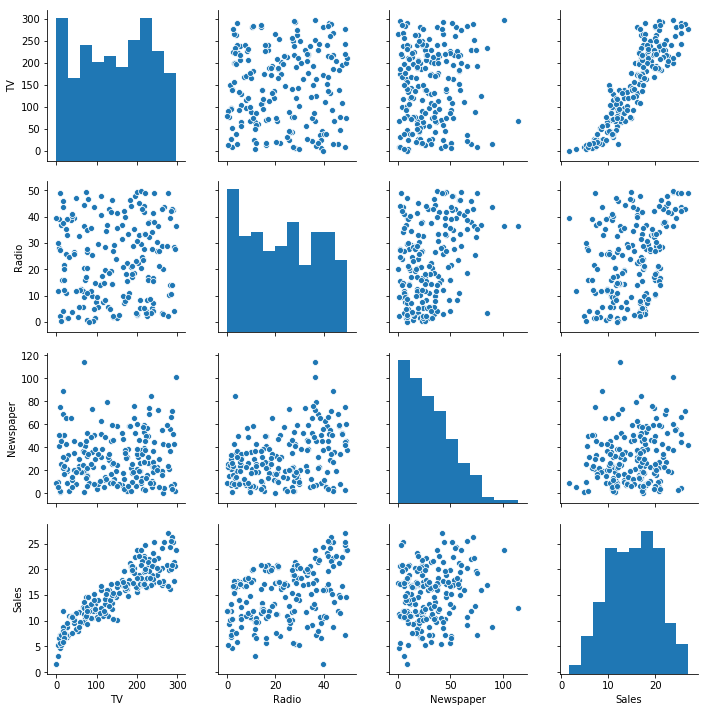

In [0]:
sns.pairplot(df)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f695208e7b8>,
      dtype=object)

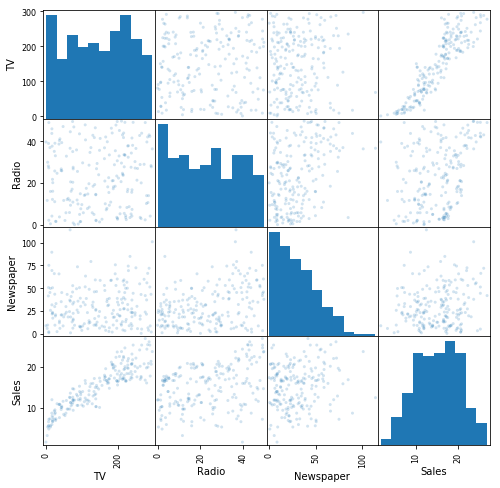

In [0]:

scatter_matrix(df, alpha=0.2)

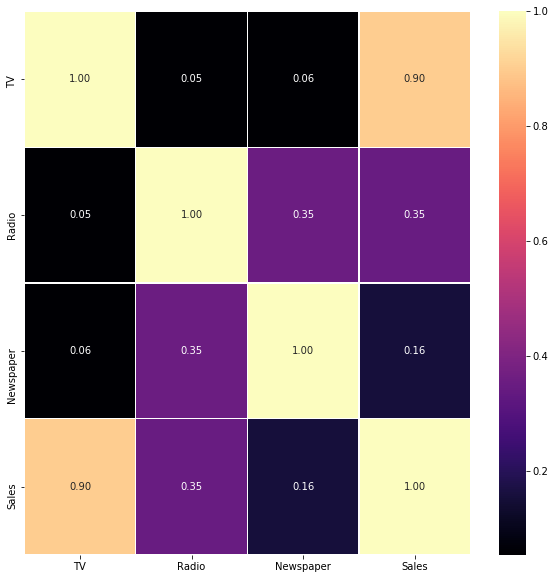

In [0]:
#HeatMAp
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),ax=ax,annot=True,linewidth=0.05,fmt='.2f',cmap='magma')
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [0]:
# TODO: create a LabelEncoder object and fit it to each feature in X


# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
X_2 = df.apply(le.fit_transform)
X_2.head()

In [0]:
# TODO: create a OneHotEncoder object, and fit it to all of X

# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(X_2)

# 3. Transform
onehotlabels = enc.transform(X_2).toarray()
onehotlabels.shape


In [0]:
onehotlabels

In [0]:
x = df.drop(['Sales'],axis=1)
y = df['Sales']
x = preprocessing.normalize(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [0]:
linearRegressor = LinearRegression()
linearRegressor.fit(x_train, y_train)
y_predicted = linearRegressor.predict(x_test)
mse = mean_squared_error(y_test, y_predicted)
r = r2_score(y_test, y_predicted)
mae = mean_absolute_error(y_test,y_predicted)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 10.934573436358413
R score: 0.43664604889245695
Mean Absolute Error: 2.6198186843831577


In [0]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x_train)
x_poly_test = polynomial_features.fit_transform(x_test)
model = LinearRegression()
model.fit(x_poly, y_train)
y_predicted_p = model.predict(x_poly_test)
mse = mean_squared_error(y_test, y_predicted_p)
r = r2_score(y_test, y_predicted_p)
mae = mean_absolute_error(y_test,y_predicted_p)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 8.32070568025112
R score: 0.571313645817578
Mean Absolute Error: 2.3679589843749995


In [0]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train, y_train)
y_predicted_d = regressor.predict(x_test)
mse = mean_squared_error(y_test, y_predicted_d)
r = r2_score(y_test, y_predicted_d)
mae = mean_absolute_error(y_test,y_predicted_d)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 23.666249999999998
R score: -0.21929543232726778
Mean Absolute Error: 3.7775


In [0]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0, n_estimators=300)
rf.fit(x_train,y_train);
y_predicted_r = rf.predict(x_test)

mse = mean_squared_error(y_test, y_predicted_r)
r = r2_score(y_test, y_predicted_r)
mae = mean_absolute_error(y_test,y_predicted_r)

print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 15.425802711111015
R score: 0.20525597483170133
Mean Absolute Error: 3.342933333333323


In [0]:
# Neural Networks
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(3,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='relu'))
model.summary()
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
history = model.fit(x_train,y_train,batch_size=100,epochs=20,verbose=1)
test=model.evaluate(x_test, y_test, verbose=1)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 256)               1024      
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 257       
Total params: 198,657
Trainable params: 198,657
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
160/160 [==============================] - 0s 2ms/step - loss: 14.9770 - mean_absolute_error: 14.9770
E

In [0]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge, SGDRegressor

In [0]:
SGD=SGDRegressor(max_iter=1000, tol=1e-3)
SGD.fit(x_train, y_train)
y_res = SGD.predict(x_test)
mse = mean_squared_error(y_test, y_res)
r = r2_score(y_test, y_res)
mae = mean_absolute_error(y_test,y_res)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 10.35311662855678
R score: 0.46660295502875326
Mean Absolute Error: 2.557089085552019


In [0]:
l=Lasso(alpha=0.1)
l.fit(x_train, y_train)
y_res = l.predict(x_test)
mse = mean_squared_error(y_test, y_res)
r = r2_score(y_test, y_res)
mae = mean_absolute_error(y_test,y_res)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 10.026365426785569
R score: 0.4834373182179821
Mean Absolute Error: 2.4884761278540526


In [0]:
ridge=Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
y_res = ridge.predict(x_test)
mse = mean_squared_error(y_test, y_res)
r = r2_score(y_test, y_res)
mae = mean_absolute_error(y_test,y_res)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 10.805198243293306
R score: 0.4433115147757609
Mean Absolute Error: 2.6168021317059433
